In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("owid-covid-data.xlsx")
france_data = data[data['location'] == 'France']
france_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
103027,FRA,Europe,France,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
103028,FRA,Europe,France,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
103029,FRA,Europe,France,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,35.6,NaN,5.98,82.66,0.901,67813000,-1002.2,-7.29,-7.29,-15.542791
103030,FRA,Europe,France,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
103031,FRA,Europe,France,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN


In [7]:
#data missingness
missing_data = france_data.isnull().sum()
threshold = 0.3 * len(france_data)
missing_data = missing_data[missing_data < threshold]
missing_data

iso_code                                0
continent                               0
location                                0
date                                    0
total_cases                            23
new_cases                               0
new_cases_smoothed                      5
total_deaths                           72
new_deaths                              0
new_deaths_smoothed                     5
total_cases_per_million                23
new_cases_per_million                   0
new_cases_smoothed_per_million          5
total_deaths_per_million               72
new_deaths_per_million                  0
new_deaths_smoothed_per_million         5
reproduction_rate                     319
icu_patients                          248
icu_patients_per_million              248
hosp_patients                         248
hosp_patients_per_million             248
weekly_icu_admissions                 255
weekly_icu_admissions_per_million     255
weekly_hosp_admissions            

In [10]:
# drop data with >30% missingness
france_data_clean = france_data.dropna(thresh=threshold, axis=1)

In [13]:
# impute missing values using knn
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
numeric_cols = france_data_clean.select_dtypes(include=['float64', 'int64']).columns
france_data_clean[numeric_cols] = imputer.fit_transform(france_data_clean[numeric_cols])
missing_values_count = france_data_clean.isnull().sum()
missing_values_count[missing_values_count > 0]

/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_70391/4044444197.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france_data_clean[numeric_cols] = imputer.fit_transform(france_data_clean[numeric_cols])


tests_units    590
dtype: int64

In [14]:
# drop quasi constant features with more than 99% same values
quasi_constant_threshold = 0.99 * len(france_data_clean)
for column in france_data_clean.columns:
    if france_data_clean[column].value_counts().iloc[0] > quasi_constant_threshold:
        france_data_clean.drop(column, axis=1, inplace=True)

In [15]:
# data description
france_data_clean.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index
count,1.357000e+03,1.357000e+03,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,...,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.00000,1357.000000,1357.000000
mean,1.748901e+07,2.873802e+04,28767.258770,108893.994105,123.791452,123.892319,270616.147886,444.677686,445.130103,1684.971087,...,115784.302137,115309.723213,133.078009,52.706647,49.157284,35.806199,1700.376713,40457.42255,0.059720,34.150199
std,1.602645e+07,1.556070e+05,52432.946501,57100.113193,519.335295,159.257111,247985.324936,2407.785179,811.321106,883.538576,...,201512.793248,184734.535493,96.449591,35.085479,34.667294,31.007315,2724.207915,89423.75907,0.131841,27.335112
min,3.000000e+00,0.000000e+00,0.000000,43.000000,0.000000,0.000000,0.046000,0.000000,0.000000,0.665000,...,9.000000,395.000000,0.000000,0.000000,0.000000,0.000000,6.000000,33.00000,0.000000,0.000000
25%,2.338258e+06,0.000000e+00,2231.143000,63534.000000,0.000000,24.000000,36181.033000,0.000000,34.524000,983.093000,...,642.000000,584.800000,5.830000,4.020000,1.920000,0.000000,8.400000,495.00000,0.001000,11.110000
50%,7.203450e+06,0.000000e+00,11547.000000,120453.000000,0.000000,60.571000,111462.576000,0.000000,178.672000,1863.829000,...,20688.600000,26935.000000,172.300000,77.930000,72.790000,53.190000,397.000000,584.40000,0.001000,41.040000
75%,3.581839e+07,0.000000e+00,30313.571000,157764.000000,0.000000,147.571000,554235.790000,0.000000,469.057000,2441.161000,...,120022.000000,137348.000000,223.020000,80.550000,78.330000,65.730000,2025.000000,22813.00000,0.034000,51.850000
max,3.899749e+07,2.417043e+06,345291.857000,167985.000000,5602.000000,800.286000,603427.621000,37400.112000,5342.873000,2599.316000,...,970640.000000,734590.000000,227.820000,80.630000,78.440000,70.350000,10833.000000,411291.00000,0.607000,87.960000


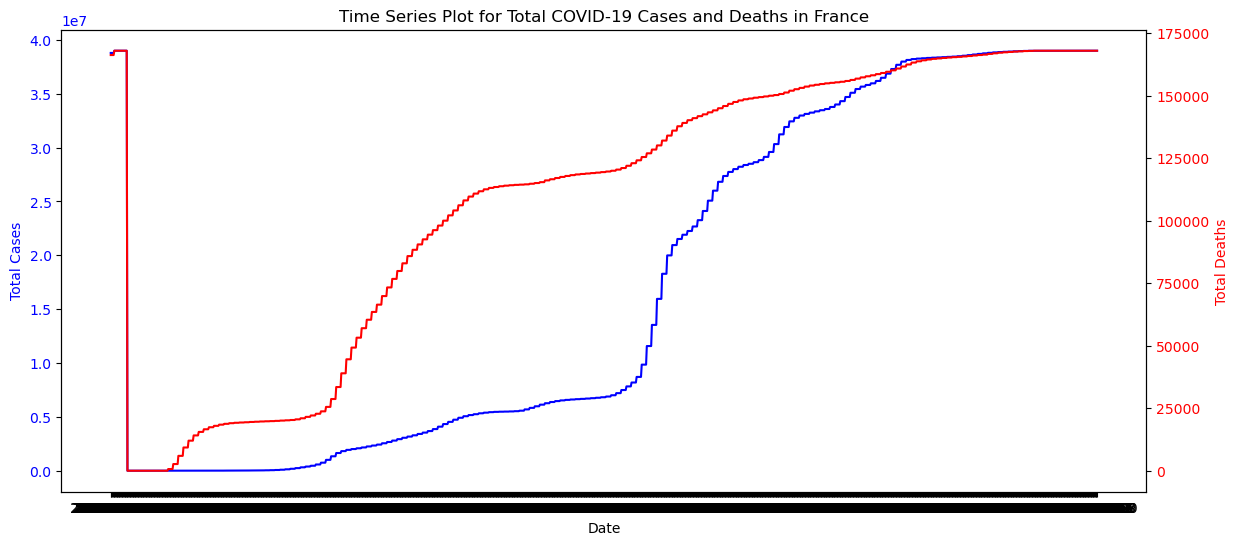

In [23]:
# Plot total cases and total deaths over time
fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.plot(france_data_clean['date'], france_data_clean['total_cases'], color='blue', label='Total Cases')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Cases', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(france_data_clean['date'], france_data_clean['total_deaths'], color='red', label='Total Deaths')
ax2.set_ylabel('Total Deaths', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Time Series Plot for Total COVID-19 Cases and Deaths in France')
plt.show()

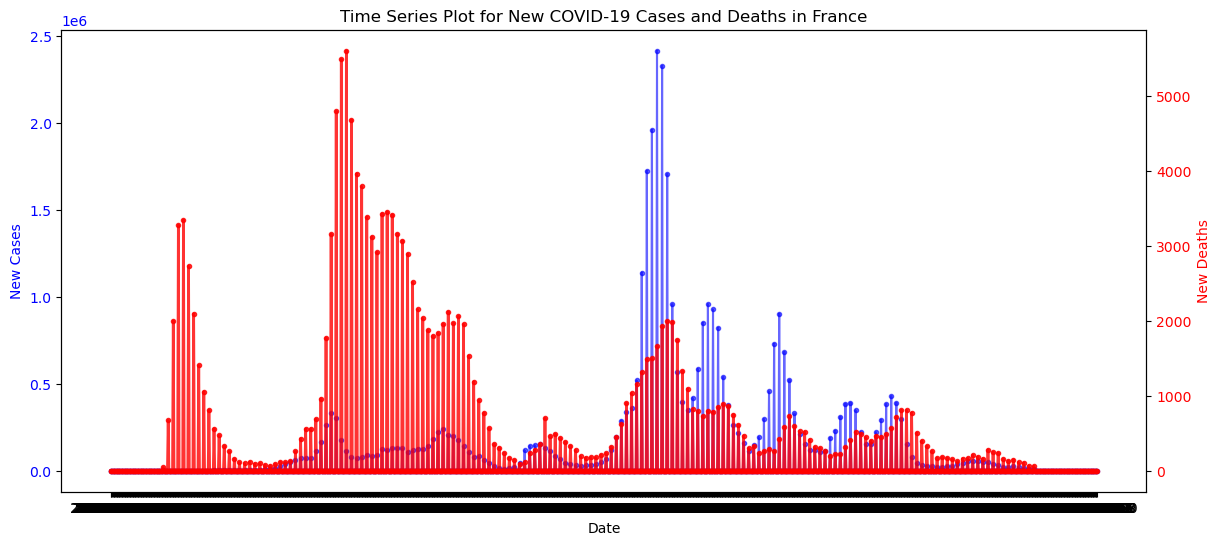

In [26]:
# Plot new cases and new deaths over time
fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.plot(france_data_clean['date'], france_data_clean['new_cases'], color='blue', label='New Cases', marker='o', markersize=3, linestyle='-', alpha=0.6)
ax1.set_xlabel('Date')
ax1.set_ylabel('New Cases', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(france_data_clean['date'], france_data_clean['new_deaths'], color='red', label='New Deaths', marker='o', markersize=3, linestyle='-', linewidth=2, alpha=0.8)
ax2.set_ylabel('New Deaths', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Time Series Plot for New COVID-19 Cases and Deaths in France')
plt.show()


## Feature Engineering

In [27]:
# lagged features with new_cases and new_deaths
for lag in [1, 7, 14]:
    france_data_clean[f'new_cases_lag{lag}'] = france_data_clean['new_cases'].shift(lag)
    france_data_clean[f'new_deaths_lag{lag}'] = france_data_clean['new_deaths'].shift(lag)

/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_70391/499614685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france_data_clean[f'new_cases_lag{lag}'] = france_data_clean['new_cases'].shift(lag)
/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_70391/499614685.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france_data_clean[f'new_deaths_lag{lag}'] = france_data_clean['new_deaths'].shift(lag)
/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_70391/499614685.py:3: Setti

In [35]:
# rolling window 7-day and 14-day for new_cases and new_deaths
for window in [7, 14]:
    france_data_clean[f'new_cases_roll_mean{window}'] = france_data_clean['new_cases'].rolling(window=window).mean()
    france_data_clean[f'new_deaths_roll_mean{window}'] = france_data_clean['new_deaths'].rolling(window=window).mean()
    france_data_clean[f'new_cases_roll_std{window}'] = france_data_clean['new_cases'].rolling(window=window).std()
    france_data_clean[f'new_deaths_roll_std{window}'] = france_data_clean['new_deaths'].rolling(window=window).std()

/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_70391/1024389625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france_data_clean[f'new_cases_roll_mean{window}'] = france_data_clean['new_cases'].rolling(window=window).mean()
/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_70391/1024389625.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france_data_clean[f'new_deaths_roll_mean{window}'] = france_data_clean['new_deaths'].rolling(window=window).mean()
/var/folders/n4/3g40sf9n163f

In [34]:
# Data time features
france_data_clean['date'] = pd.to_datetime(france_data_clean['date'])
france_data_clean['day_of_week'] = france_data_clean['date'].dt.dayofweek
# 0 refers to Monday and 6 to Sunday, we want to tell if the date is weekend or not
france_data_clean['weekend'] = np.where(france_data_clean['day_of_week'].isin([5, 6]), 1, 0)
france_data_clean[['date', 'day_of_week', 'weekend']].head(2)
# we may also want to include variables for public holiday or not, season of the year, etc
# source: https://medium.com/data-science-at-microsoft/introduction-to-feature-engineering-for-time-series-forecasting-620aa55fcab0 

/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_70391/2144597734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france_data_clean['date'] = pd.to_datetime(france_data_clean['date'])
/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_70391/2144597734.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france_data_clean['day_of_week'] = france_data_clean['date'].dt.dayofweek
/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_70391/2144597734.py:5: SettingWithCopyWarning: 
A val

,date,day_of_week,weekend
103027,2020-01-03,4,0
103028,2020-01-04,5,1
